In [2]:
#======================================================#
#     LAB 10 - K Nearest Neighbours                    #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: Machine Learning Lab (Kavinder Sir)     #
#======================================================#

In [3]:
#Import header files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import Counter

In [4]:
#Importing the dataset
df=pd.read_csv('iris.csv')

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.shape

(150, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
#Jumbling the dataset
shuffle_df = df.sample(frac=1)

#dividing the dataset into test and train sets
train_size = int(0.7 * len(df))

train_set = shuffle_df[:train_size]
test_set = shuffle_df[train_size:]

In [10]:
rows, col = train_set.shape
rows ,col

(105, 6)

In [11]:
#Creating the map for output variable
mapping = {
    'Iris-setosa' : 1,
    'Iris-versicolor' : 2,
    'Iris-virginica' : 3
}

#Removing the ID column and applying the output variable transformation
X_train = train_set.drop(['Id', 'Species'], axis=1).values # Input Feature Values
Y_train = train_set.Species.replace(mapping).values.reshape(rows,1) # Output values

#test data
X_test = test_set.drop(['Id', 'Species'], axis=1).values # Input Feature Values
Y_test = test_set.Species.replace(mapping).values.reshape(45,1) # Output values

In [12]:
#colour map for visualisation in graph
cmap = ListedColormap(['#FF0000','#00FF00','#0000FF'])

In [13]:
#Funtion to calculate the euclidean distance
def euclidean_distance(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [14]:
#Class for KNN
class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]

        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority vote
        most_common = Counter(tuple(label) for label in k_nearest_labels).most_common()
        return most_common[0][0]

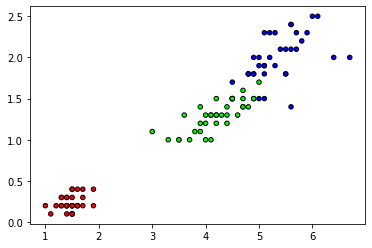

In [15]:
#Visualising the dataset
plt.figure()
plt.scatter(X_train[:,2],X_train[:,3], c=Y_train, cmap=cmap, edgecolor='k', s=20)
plt.show()

In [19]:
#Actually initialising the KNN class
clf = KNN(k=5)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

#Printing the predictions
print(predictions) 

#printing the actuals 
#print(Y_test)

[(3,), (2,), (1,), (3,), (3,), (3,), (1,), (3,), (2,), (2,), (2,), (2,), (1,), (1,), (1,), (1,), (1,), (1,), (3,), (2,), (3,), (2,), (1,), (3,), (1,), (1,), (1,), (2,), (3,), (3,), (1,), (2,), (1,), (3,), (3,), (2,), (3,), (3,), (3,), (3,), (3,), (1,), (2,), (1,), (1,)]


In [20]:
#Calculating the accuracy
acc = np.sum(predictions == Y_test) / len(Y_test)
print(acc)

0.9777777777777777
